# Modul K-Means Clustering dan Principal Component Analysis (PCA) - v2

__Renny Pradina Kusumawardani__

*v2 - 28 Mei 2024*

This version uses Happiness 2024 data: https://worldhappiness.report/data/.

Codes are written such that they are easier and more obvious to modify.

Happiness indicators: GDP per capita, social support, healthy life expectancy, freedom, generosity, and corruption. The happiness report also mention positive emotion and negative emotion.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [2]:
colnames = ["country", "year", "life_ladder", "log_gdp", "soc_support", "life_exp", "free_life", "generosity", "corruption_percp", "pos_affect", "neg_affect"]
df = pd.read_excel("/Users/renny/Documents/Data/Happiness Data 2024/DataForTable2.1.xls", names = colnames)

In [3]:
df23 = df[df['year']==2023]

In [4]:
df23

,country,year,life_ladder,log_gdp,soc_support,life_exp,free_life,generosity,corruption_percp,pos_affect,neg_affect
14,Afghanistan,2023,1.445909,NaN,0.368478,55.200001,0.228301,NaN,0.738471,0.260513,0.460167
30,Albania,2023,5.444691,9.688706,0.690753,69.199997,0.871545,0.067885,0.855425,0.597349,0.314227
63,Argentina,2023,6.393229,9.993596,0.892118,67.300003,0.831684,-0.129061,0.846094,0.720122,0.301162
80,Armenia,2023,5.679090,9.729613,0.819338,68.199997,0.819376,-0.179444,0.680709,0.574717,0.422631
97,Australia,2023,7.024582,10.846434,0.896460,71.199997,0.875769,0.187309,0.481580,0.731053,0.248163
...,...,...,...,...,...,...,...,...,...,...,...
2295,Venezuela,2023,5.765363,NaN,0.884668,63.700001,0.756530,NaN,0.825393,0.757685,0.300038
2313,Vietnam,2023,6.325115,9.392351,0.844905,65.699997,0.955560,-0.159114,0.655275,0.710068,0.119510
2327,Yemen,2023,3.531574,NaN,0.824958,56.599998,0.582724,NaN,0.771464,0.446534,0.340794
2344,Zambia,2023,3.685568,8.115053,0.664099,56.099998,0.854004,0.092377,0.814191,0.652999,0.359132


In [5]:
df23.isnull().any(axis=1).sum()

18

In [6]:
df23.isnull().any(axis=0)

country             False
year                False
life_ladder         False
log_gdp              True
soc_support         False
life_exp             True
free_life            True
generosity           True
corruption_percp     True
pos_affect          False
neg_affect          False
dtype: bool

There are 5 of 9 columns with NaNs, while there are only 18 of 138 rows with NaNs. Therefore, we will drop the NaNs rows.

In [7]:
df23 = df23.dropna()

In [8]:
df23.shape

(120, 11)

In [9]:
df23.head()

,country,year,life_ladder,log_gdp,soc_support,life_exp,free_life,generosity,corruption_percp,pos_affect,neg_affect
30,Albania,2023,5.444691,9.688706,0.690753,69.199997,0.871545,0.067885,0.855425,0.597349,0.314227
63,Argentina,2023,6.393229,9.993596,0.892118,67.300003,0.831684,-0.129061,0.846094,0.720122,0.301162
80,Armenia,2023,5.679090,9.729613,0.819338,68.199997,0.819376,-0.179444,0.680709,0.574717,0.422631
97,Australia,2023,7.024582,10.846434,0.896460,71.199997,0.875769,0.187309,0.481580,0.731053,0.248163
113,Austria,2023,6.635664,10.930412,0.874427,71.400002,0.874083,0.209268,0.529430,0.712497,0.239608


Let's get only the features:

In [10]:
df23_features = df23.drop(['country', 'year'], axis=1)

In [11]:
df23_features.head()

,life_ladder,log_gdp,soc_support,life_exp,free_life,generosity,corruption_percp,pos_affect,neg_affect
30,5.444691,9.688706,0.690753,69.199997,0.871545,0.067885,0.855425,0.597349,0.314227
63,6.393229,9.993596,0.892118,67.300003,0.831684,-0.129061,0.846094,0.720122,0.301162
80,5.679090,9.729613,0.819338,68.199997,0.819376,-0.179444,0.680709,0.574717,0.422631
97,7.024582,10.846434,0.896460,71.199997,0.875769,0.187309,0.481580,0.731053,0.248163
113,6.635664,10.930412,0.874427,71.400002,0.874083,0.209268,0.529430,0.712497,0.239608


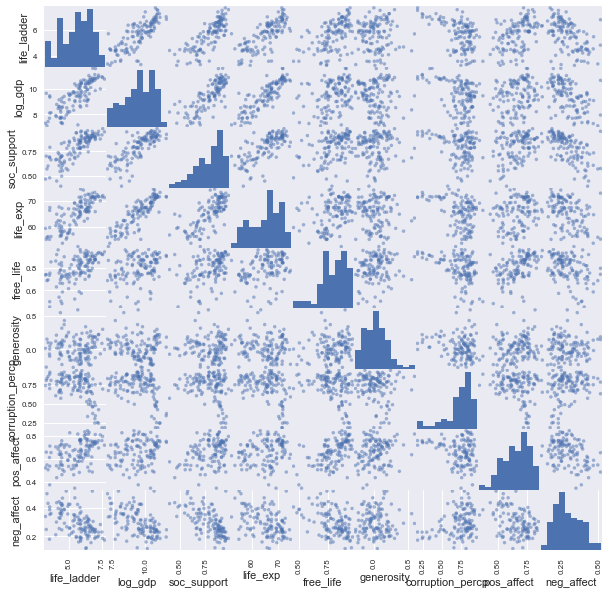

In [12]:
plt.style.use("seaborn")
pd.plotting.scatter_matrix(df23_features, figsize=(10, 10))
plt.show()

## Perform Min-Max Scaling

In [13]:
X = MinMaxScaler().fit_transform(df23_features)

In [14]:
df23_minmax = pd.DataFrame(data = X, columns = df23_features.columns.tolist())

In [15]:
df23_minmax.insert(0, 'country', df23['country'].values, False)

In [16]:
df23_minmax

,country,life_ladder,log_gdp,soc_support,life_exp,free_life,generosity,corruption_percp,pos_affect,neg_affect
0,Albania,0.490779,0.568044,0.503900,0.758928,0.818021,0.391827,0.879063,0.507222,0.498428
1,Argentina,0.705049,0.634328,0.850721,0.674107,0.740260,0.162223,0.866853,0.753359,0.465938
2,Armenia,0.543729,0.576937,0.725369,0.714286,0.716251,0.103486,0.650463,0.461848,0.768013
3,Australia,0.847668,0.819738,0.858201,0.848214,0.826259,0.531054,0.389923,0.775273,0.334136
4,Austria,0.759814,0.837996,0.820252,0.857143,0.822972,0.556655,0.452529,0.738071,0.312861
...,...,...,...,...,...,...,...,...,...,...
115,Uruguay,0.765700,0.662301,0.878721,0.683036,0.881651,0.254096,0.625536,0.820171,0.375553
116,Uzbekistan,0.703272,0.423940,0.879557,0.611607,0.925778,0.600803,0.609681,0.816761,0.219850
117,Vietnam,0.689662,0.503615,0.769405,0.602678,0.981913,0.127187,0.617185,0.733201,0.014194
118,Zambia,0.093402,0.225925,0.457992,0.174107,0.783802,0.420380,0.825111,0.618790,0.610101


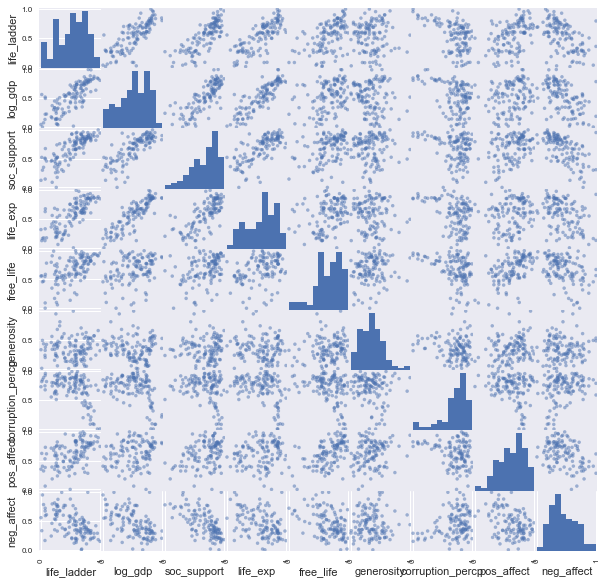

In [17]:
pd.plotting.scatter_matrix(df23_minmax.drop('country', axis=1), figsize=(10, 10))
plt.show()

## Clustering

### How Many Clusters?

In [18]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Elbow Method

In [19]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

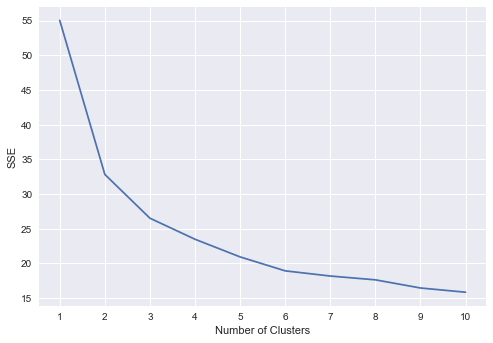

In [20]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Determining the elbow programmatically:

In [21]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

### Silhouette Coefficient

In [22]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

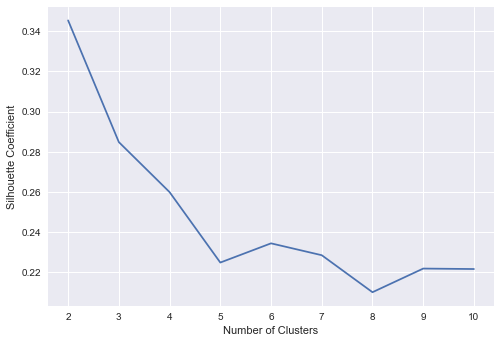

In [23]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### The actual clustering

In [24]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [25]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

In [26]:
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)

26.51439535516713
[[0.26536766 0.27700092 0.44500819 0.33501984 0.53583157 0.38493998
  0.79006186 0.52748233 0.61213435]
 [0.64227478 0.62224939 0.78910084 0.68186093 0.71955587 0.28204682
  0.77994063 0.64945396 0.37300607]
 [0.84322908 0.84473306 0.88623831 0.86334328 0.84680729 0.47792414
  0.27571487 0.77895205 0.27177494]]
3


In [27]:
membership = kmeans.labels_

In [28]:
membership.dtype

dtype('int32')

# Principal Component Analysis

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca   = PCA()
x_pca = pca.fit_transform(X)

Variance explained by principal components:

In [31]:
pca.explained_variance_ratio_

array([0.53868676, 0.14219905, 0.09210011, 0.06777099, 0.06046966,
       0.04295191, 0.02678766, 0.01459466, 0.0144392 ])

In [32]:
x_pca.shape

(120, 9)

## Cluster Visualization

Only two components could be visualized, therefore we select the first two components.

In [33]:
pc = pd.DataFrame(x_pca[:,:2], columns=['pc1', 'pc2'])

The results of previous number of k analysis indicate 3 as a reasonable number of clusters, so we select three colors for the visualization.

In [34]:
pale_green  = ['#90ee90']
yellow      = ['#ffff66']
magenta     = ['#c20078']

clust_colors = pale_green + yellow + magenta

In [35]:
colors = [clust_colors[m] for m in membership]

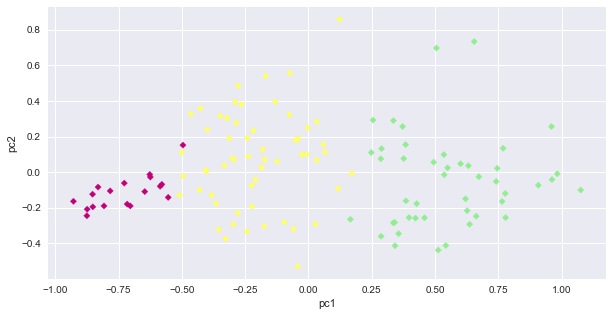

In [36]:
pc.plot.scatter('pc1', 'pc2', c = colors, figsize = (10, 5), marker='D')
plt.show()

### Comparison with Variance of Original (Scaled) Data

In [37]:
pca_features = pd.DataFrame(x_pca, columns=['pc'+str(i) for i in range(1, x_pca.shape[1]+1)])
# pca_features = pd.DataFrame(x_pca, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])
pca_features

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,0.032245,0.067721,-0.017147,0.085846,-0.145092,0.229064,-0.180189,-0.120666,0.007065
1,-0.236598,0.087837,-0.224481,-0.028818,-0.202328,-0.065553,0.065398,0.017619,0.003796
2,-0.002796,0.248679,0.157267,-0.086263,-0.309837,0.073721,0.082301,0.118239,-0.049061
3,-0.646741,-0.109426,0.212045,0.094316,0.026194,-0.031138,-0.008361,-0.021840,0.027929
4,-0.585966,-0.079615,0.181165,0.123491,0.055126,0.018205,-0.084187,-0.013264,0.050554
...,...,...,...,...,...,...,...,...,...
115,-0.429721,-0.100391,-0.081502,-0.081445,-0.122382,-0.026766,0.073068,0.043771,-0.003043
116,-0.327751,-0.373971,-0.081499,0.109740,0.126137,0.061879,0.073487,-0.005549,-0.139524
117,-0.365268,-0.175748,-0.226393,-0.359487,0.114414,0.139128,0.020922,-0.059478,-0.095972
118,0.636916,-0.293133,-0.054026,-0.039305,-0.010436,0.135272,-0.042996,0.174686,0.062229


Variance of original scaled data:

In [38]:
df23_minmax_vars = df23_minmax.drop('country', axis=1).var()

In [39]:
df23_minmax_vars

life_ladder         0.060547
log_gdp             0.061460
soc_support         0.050381
life_exp            0.060940
free_life           0.048481
generosity          0.036336
corruption_percp    0.051426
pos_affect          0.044833
neg_affect          0.048005
dtype: float64

In [40]:
df23_minmax_varsum = sum(df23_minmax_vars)

In [41]:
-np.sort(-np.array([a/df23_minmax_varsum for a in df23_minmax_vars]))

array([0.132913  , 0.13178864, 0.1309372 , 0.11121244, 0.10895406,
       0.10484447, 0.10381512, 0.09695596, 0.07857911])

## Clustering on Principal Components

### On all pca features

In [42]:
kmeans_pca_all = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [43]:
kmeans_pca_all.fit(pca_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [44]:
# The lowest SSE value
print(kmeans_pca_all.inertia_)

# Final locations of the centroid
print(kmeans_pca_all.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_all.n_iter_)

26.514395355167117
[[ 5.49302819e-01 -4.87083754e-02  4.82497572e-02  1.01462683e-03
   1.91623425e-02 -3.12597245e-03 -1.02266876e-02  1.14681856e-02
   4.70995639e-03]
 [-2.04418213e-01  7.42079884e-02 -1.20003153e-01 -5.23867606e-04
  -3.89609748e-02  1.24417101e-02  1.20591937e-02 -1.45832290e-02
  -7.38143518e-03]
 [-7.25932705e-01 -1.13221025e-01  2.59385590e-01 -8.77652979e-04
   7.54705639e-02 -3.15838175e-02 -1.26207276e-02  1.75097612e-02
   1.15996537e-02]]
3


### On the first PCA feature

In [45]:
kmeans_pca_first = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [46]:
kmeans_pca_first.fit(pca_features.pc1.values.reshape(-1, 1))

KMeans(init='random', n_clusters=3, random_state=42)

In [47]:
# The lowest SSE value
print(kmeans_pca_first.inertia_)

# Final locations of the centroid
print(kmeans_pca_first.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first.n_iter_)

3.9747164096824044
[[-0.63343435]
 [-0.15204756]
 [ 0.55802404]]
16


### On first two PCA features

In [48]:
kmeans_pca_first2 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [49]:
kmeans_pca_first2.fit(pca_features[['pc1', 'pc2']])

KMeans(init='random', n_clusters=3, random_state=42)

In [50]:
# The lowest SSE value
print(kmeans_pca_first2.inertia_)

# Final locations of the centroid
print(kmeans_pca_first2.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first2.n_iter_)

10.666383226941978
[[-0.49199304 -0.15334347]
 [ 0.53809209 -0.05612905]
 [-0.15898593  0.24463805]]
5


### On first three PCA features

In [51]:
kmeans_pca_first3 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [52]:
kmeans_pca_first3.fit(pca_features[['pc1', 'pc2', 'pc3']])

KMeans(init='random', n_clusters=3, random_state=42)

In [53]:
# The lowest SSE value
print(kmeans_pca_first3.inertia_)

# Final locations of the centroid
print(kmeans_pca_first3.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first3.n_iter_)

14.283608316113025
[[-0.19661721  0.07482845 -0.12355629]
 [ 0.5561497  -0.05231981  0.05675737]
 [-0.7259327  -0.11322102  0.25938559]]
6


## Calculation of the Agreement between Clustering on All Data and Results of PCA

In [54]:
from sklearn.metrics import v_measure_score

Between clustering of original scaled data and all PCA components:

In [55]:
v_measure_score(kmeans.labels_, kmeans_pca_all.labels_)

1.0

Between clustering of original scaled data and the first PCA component:

In [56]:
v_measure_score(kmeans.labels_, kmeans_pca_first.labels_)

0.7922945632099052

Between clustering of original scaled data and the first two PCA components:

In [57]:
v_measure_score(kmeans.labels_, kmeans_pca_first2.labels_)

0.6436751418988386

Between clustering of original scaled data and the first three PCA components:

In [58]:
v_measure_score(kmeans.labels_, kmeans_pca_first3.labels_)

0.9591707219069633

## References

Modul ini ditulis berdasarkan modul mata kuliah Analitika Bisnis lampau (Renny P. Kusumawardani, 2022) dan berbagai sumber di Internet.

Sumber yang direkomendasikan untuk belajar mengenai algoritma K-Means, terutama dari sisi aplikasi, antara lain:  https://realpython.com/k-means-clustering-python/.